In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
with open('ClaMP_Integrated.csv') as file:
    df = pd.read_csv(file, encoding='utf-8')

In [3]:
pt = df['packer_type'].unique()
p_types = {pt[i] : i for i in range(len(pt))}

In [4]:
temp = []
for t in df['packer_type']:
    temp.append(p_types[t])
df['pt_num'] = temp
cl = df.pop('class')
df.pop('packer_type')
x_train, x_test, y_train, y_test = train_test_split(df, cl, random_state=0)

In [5]:
svc = SVC()
nb = GaussianNB()
minMax = MinMaxScaler()
norm = Normalizer()
stdSc = StandardScaler()
robustSc = RobustScaler()
maxAbs = MaxAbsScaler()

In [6]:
X_train_minmaxSc = minMax.fit_transform(x_train)
X_test_minmaxSc = minMax.transform(x_test)

X_train_norm = norm.fit_transform(x_train)
X_test_norm = norm.transform(x_test)

X_train_std = stdSc.fit_transform(x_train)
X_test_std = stdSc.transform(x_test)

X_train_robust = robustSc.fit_transform(x_train)
X_test_robust = robustSc.transform(x_test)

X_train_maxAbs = maxAbs.fit_transform(x_train)
X_test_maxAbs = maxAbs.transform(x_test)

y_tr_minmax = X_train_minmaxSc[:, 66]
y_tr_std = X_train_std[:, 66]
y_tr_robust = X_train_robust[:, 66]
y_tr_maxAbs = X_test_maxAbs[:, 66]
y_tr_norm = X_train_norm[:, 66]
y_tr = pd.DataFrame.to_numpy(x_train)[:, 66]
x = np.arange(1, 20)

y_t_minmax = X_test_minmaxSc[:, 66]
y_t_std = X_test_std[:, 66]
y_t_robust = X_test_robust[:, 66]
y_t_maxAbs = X_test_maxAbs[:, 66]
y_t_norm = X_test_norm[:, 66]
y_t = pd.DataFrame.to_numpy(x_test)[:, 66]
x = np.arange(1, 21)

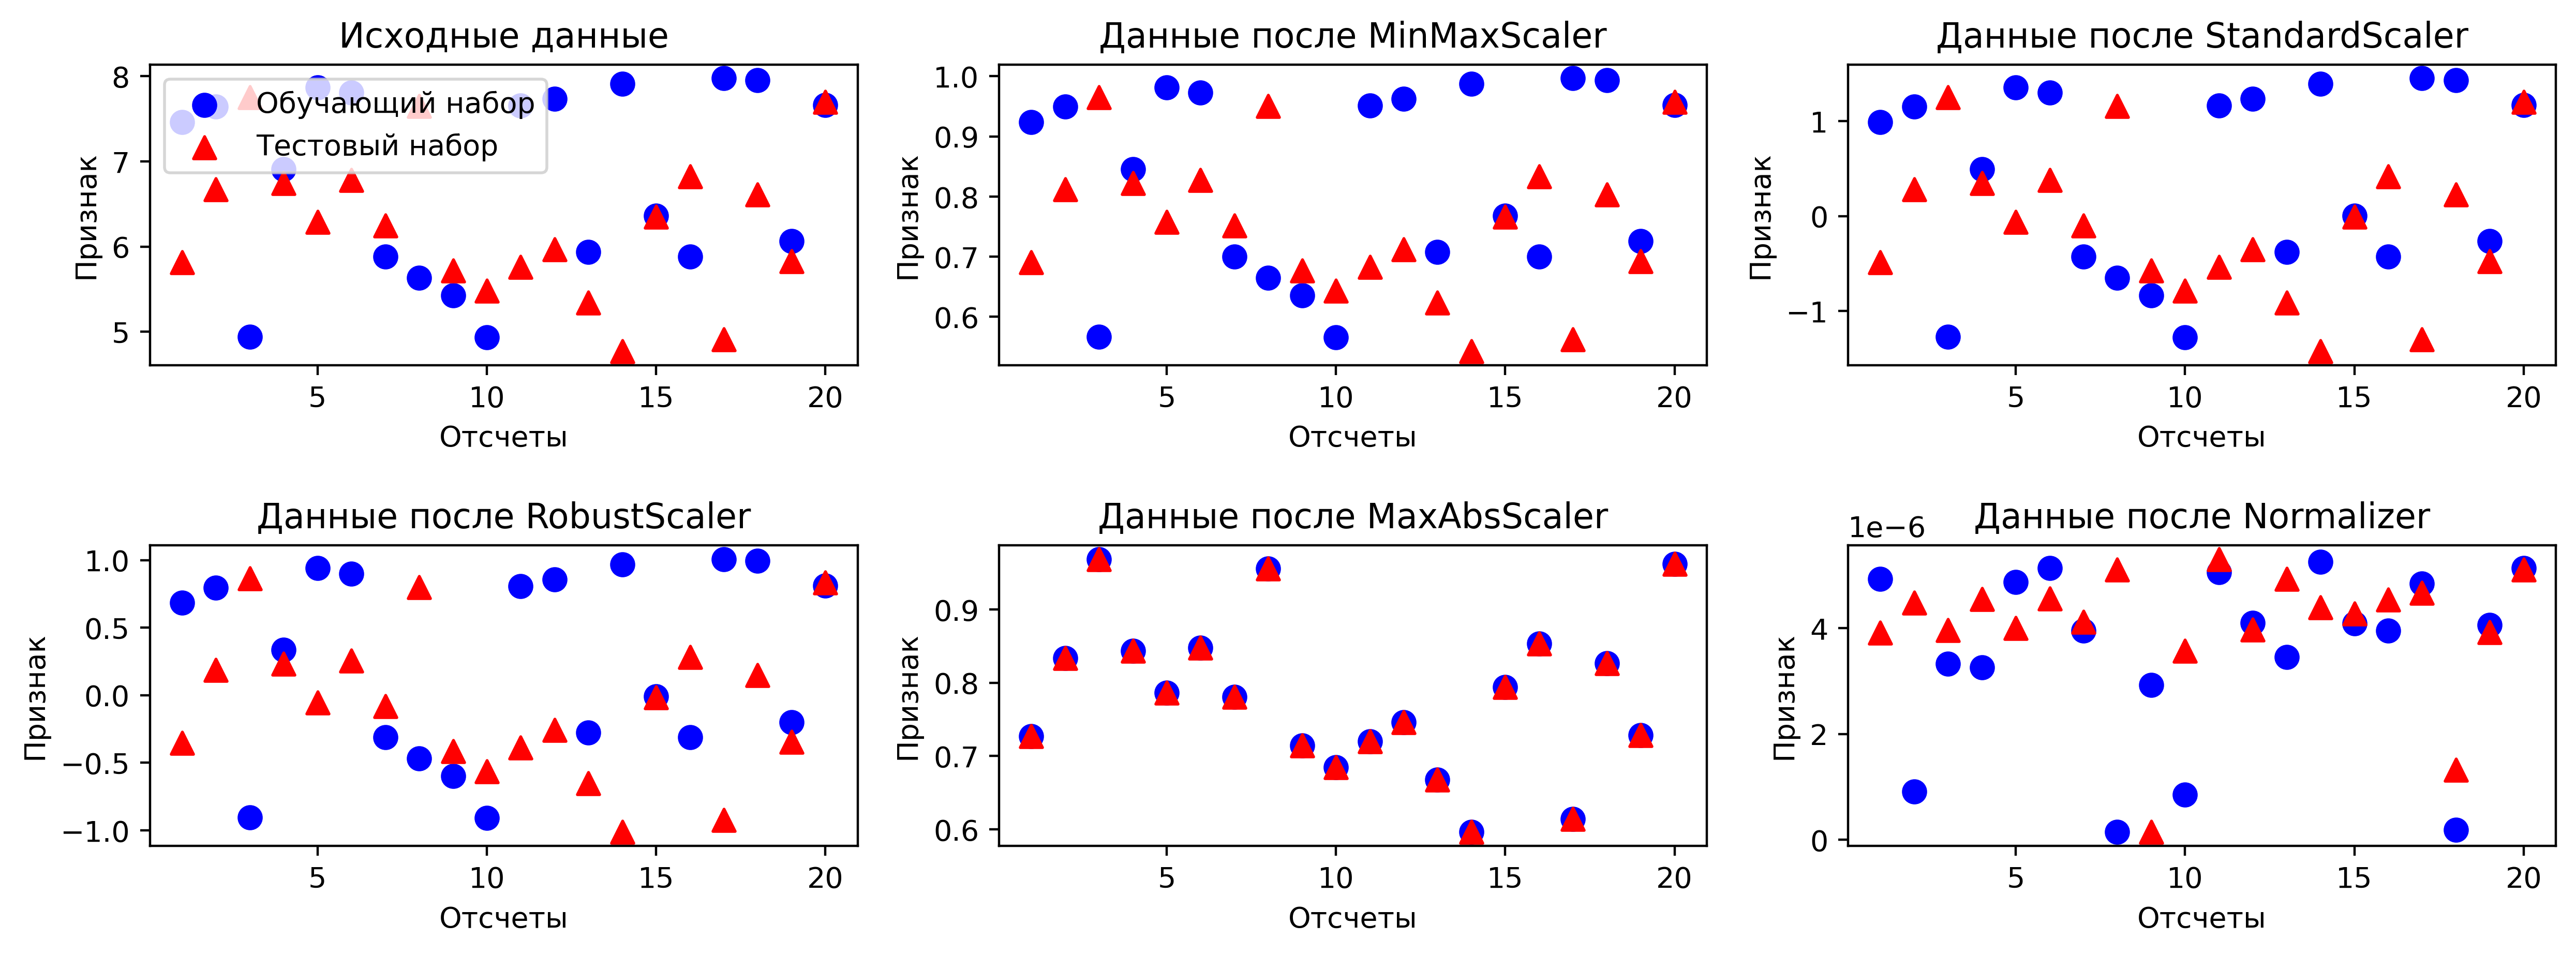

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15, 5), dpi=400 )
plt.subplots_adjust(hspace= .6)

axes[0][0].scatter(x, y_tr[:20], color='b', label = "Обучающий набор", s=60)
axes[0][0].scatter(x, y_t[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][0].legend(loc = "upper left")
axes[0][0].set_title('Исходные данные')

axes[0][1].scatter(x, y_tr_minmax[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[0][1].scatter(x, y_t_minmax[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][1].set_title('Данные после MinMaxScaler')

axes[0][2].scatter(x, y_tr_std[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[0][2].scatter(x, y_t_std[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][2].set_title('Данные после StandardScaler')

axes[1][0].scatter(x, y_tr_robust[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][0].scatter(x, y_t_robust[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][0].set_title('Данные после RobustScaler')

axes[1][1].scatter(x, y_tr_maxAbs[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][1].scatter(x, y_t_maxAbs[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][1].set_title('Данные после MaxAbsScaler')

axes[1][2].scatter(x, y_tr_norm[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][2].scatter(x, y_t_norm[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][2].set_title('Данные после Normalizer')

for ax in axes:
    for a in ax:
        a.set_xlabel('Отсчеты')
        a.set_ylabel('Признак')

In [8]:
pipeMinMax = Pipeline([('scaler', MinMaxScaler()), ('GNB', GaussianNB())])
pipeMinMax.fit(x_train, y_train)

pipeNorm = Pipeline([('scaler', Normalizer()), ('GNB', GaussianNB())])
pipeNorm.fit(x_train, y_train)

pipeStd = Pipeline([('scaler', StandardScaler()), ('GNB', GaussianNB())])
pipeStd.fit(x_train, y_train)

pipeRobust = Pipeline([('scaler', RobustScaler()), ('GNB', GaussianNB())])
pipeRobust.fit(x_train, y_train)

pipeMaxAbs = Pipeline([('scaler', MaxAbsScaler()), ('GNB', GaussianNB())])
pipeMaxAbs.fit(x_train, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()), ('GNB', GaussianNB())])

In [9]:
param_grid = {'var_smoothing': 
    [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

grid = GridSearchCV(GaussianNB(), param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)

print('Правильность на исходном наборе: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

param_grid = {'GNB__var_smoothing': 
    [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

grid = GridSearchCV(pipeMinMax, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после MinMaxScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeNorm, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после Normalizer: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeStd, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после StdScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeRobust, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после RobustScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeMaxAbs, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после MaxAbsScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

Правильность на исходном наборе: 0.576
Правильность на перекрестной проверке: 0.590
Наилучшая модель: {'var_smoothing': 1e-10}
Правильность после MinMaxScaler: 0.852
Правильность на перекрестной проверке: 0.865
Наилучшая модель: {'GNB__var_smoothing': 0.1}
Правильность после Normalizer: 0.741
Правильность на перекрестной проверке: 0.746
Наилучшая модель: {'GNB__var_smoothing': 0.1}
Правильность после StdScaler: 0.678
Правильность на перекрестной проверке: 0.710
Наилучшая модель: {'GNB__var_smoothing': 0.1}
Правильность после RobustScaler: 0.573
Правильность на перекрестной проверке: 0.588
Наилучшая модель: {'GNB__var_smoothing': 1e-08}
Правильность после MaxAbsScaler: 0.854
Правильность на перекрестной проверке: 0.865
Наилучшая модель: {'GNB__var_smoothing': 0.1}


In [10]:
pipeMinMax = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipeMinMax.fit(x_train, y_train)

pipeNorm = Pipeline([('scaler', Normalizer()), ('svm', SVC())])
pipeNorm.fit(x_train, y_train)

pipeStd = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])
pipeStd.fit(x_train, y_train)

pipeRobust = Pipeline([('scaler', RobustScaler()), ('svm', SVC())])
pipeRobust.fit(x_train, y_train)

pipeMaxAbs = Pipeline([('scaler', MaxAbsScaler()), ('svm', SVC())])
pipeMaxAbs.fit(x_train, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()), ('svm', SVC())])

In [11]:
param_grid = {'C':[0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVC(), param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)

print('Правильность на исходном наборе: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

param_grid = {'svm__C':[0.1, 1, 10, 100],
    'svm__gamma':[0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(pipeMinMax, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после MinMaxScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeNorm, param_grid, cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после Normalizer: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeStd, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после StdScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeRobust, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после RobustScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

grid = GridSearchCV(pipeMaxAbs, param_grid,
    cv = 5, n_jobs = -1)
grid.fit(x_train.to_numpy(), y_train)
print('Правильность после MaxAbsScaler: {:.3f}'.format(
    grid.score(x_test.to_numpy(), y_test)))
print('Правильность на перекрестной проверке: {:.3f}'.format(grid.best_score_))
print('Наилучшая модель: {}'.format(grid.best_params_))

Правильность на исходном наборе: 0.612
Правильность на перекрестной проверке: 0.619
Наилучшая модель: {'C': 1, 'gamma': 0.001}
Правильность после MinMaxScaler: 0.974
Правильность на перекрестной проверке: 0.971
Наилучшая модель: {'svm__C': 100, 'svm__gamma': 1}
Правильность после Normalizer: 0.874
Правильность на перекрестной проверке: 0.869
Наилучшая модель: {'svm__C': 100, 'svm__gamma': 1}
Правильность после StdScaler: 0.982
Правильность на перекрестной проверке: 0.979
Наилучшая модель: {'svm__C': 100, 'svm__gamma': 0.01}
Правильность после RobustScaler: 0.959
Правильность на перекрестной проверке: 0.957
Наилучшая модель: {'svm__C': 100, 'svm__gamma': 0.001}
Правильность после MaxAbsScaler: 0.974
Правильность на перекрестной проверке: 0.971
Наилучшая модель: {'svm__C': 100, 'svm__gamma': 1}


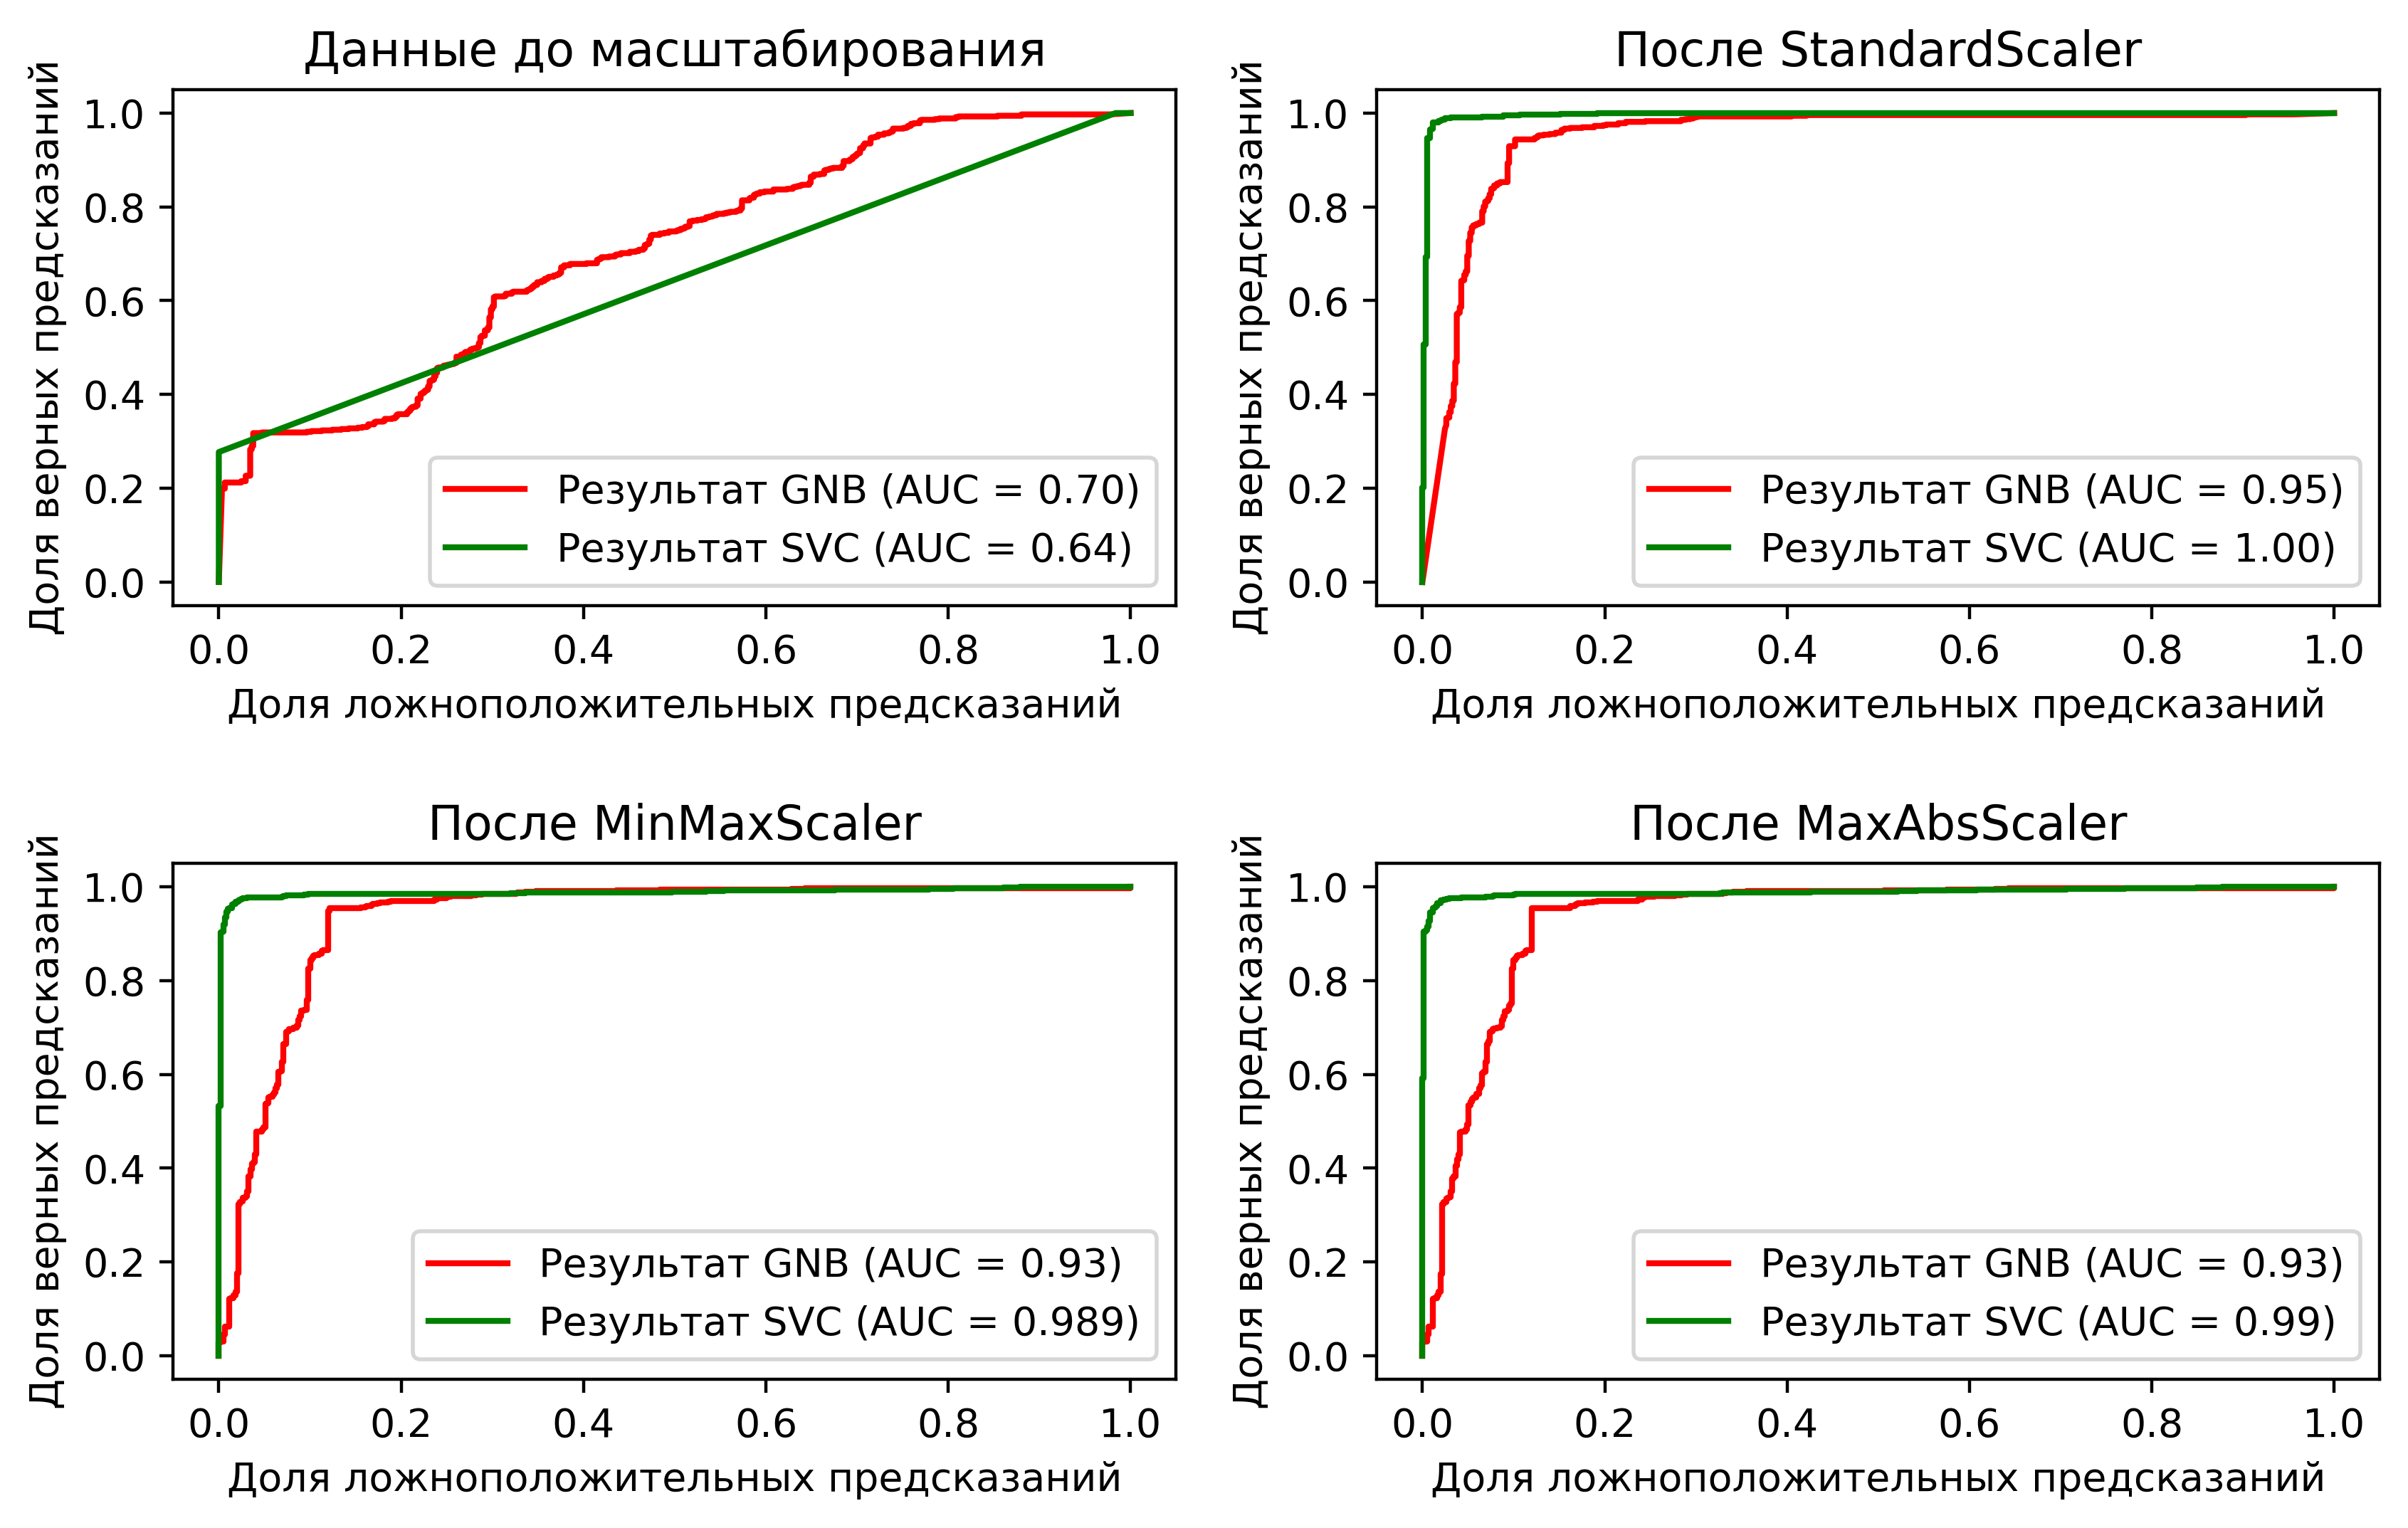

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=400)
plt.subplots_adjust(hspace=.5)

svc = SVC(C=1, gamma=0.001).fit(x_train.to_numpy(), y_train)
res = svc.decision_function(x_test.to_numpy())
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

gnb = GaussianNB(var_smoothing=1e-10).fit(x_train.to_numpy(), y_train)
res_gnb = gnb.predict_proba(x_test.to_numpy())[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, res_gnb)

axes[0][0].plot(fpr_gnb, tpr_gnb, color='r',
    label='Результат GNB (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res_gnb)))
axes[0][0].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат SVC (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res)))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('Данные до масштабирования')

svc = SVC(C=100, gamma=0.01).fit(X_train_std, y_train)
res = svc.decision_function(X_test_std)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

gnb = GaussianNB(var_smoothing=0.1).fit(
    X_train_std, y_train)
res_gnb = gnb.predict_proba(X_test_std)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, res_gnb)

axes[0][1].plot(fpr_gnb, tpr_gnb, color='r',
    label='Результат GNB (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res_gnb)))
axes[0][1].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат SVC (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res)))
axes[0][1].legend(loc='lower right')
axes[0][1].set_title('После StandardScaler')

svc = SVC(C=100, gamma=1).fit(X_train_minmaxSc, y_train)
res = svc.decision_function(X_test_minmaxSc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

gnb = GaussianNB(var_smoothing=0.1).fit(
    X_train_minmaxSc, y_train)
res_gnb = gnb.predict_proba(X_test_minmaxSc)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, res_gnb)

axes[1][0].plot(fpr_gnb, tpr_gnb, color='r',
    label='Результат GNB (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res_gnb)))
axes[1][0].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат SVC (AUC = {:.3f})'.format(
        roc_auc_score(y_test, res)))
axes[1][0].legend(loc='lower right')
axes[1][0].set_title('После MinMaxScaler')

svc = SVC(C=100, gamma=1).fit(X_train_maxAbs, y_train)
res = svc.decision_function(X_test_maxAbs)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

gnb = GaussianNB(var_smoothing=0.1).fit(
    X_train_maxAbs, y_train)
res_gnb = gnb.predict_proba(X_test_maxAbs)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, res_gnb)

axes[1][1].plot(fpr_gnb, tpr_gnb, color='r',
    label='Результат GNB (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res_gnb)))
axes[1][1].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат SVC (AUC = {:.2f})'.format(
        roc_auc_score(y_test, res)))
axes[1][1].legend(loc='lower right')
axes[1][1].set_title('После MaxAbsScaler')

for ax in axes:
    for a in ax:
        a.set_xlabel('Доля ложноположительных предсказаний')
        a.set_ylabel('Доля верных предсказаний')